In [3]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'cardio.csv',delimiter=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#data.columns
print(data.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column except the first one (assuming it's an identifier column)
for column in data.columns[1:]:
    # Apply label encoding to object-type columns
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Print the updated DataFrame
print(data.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


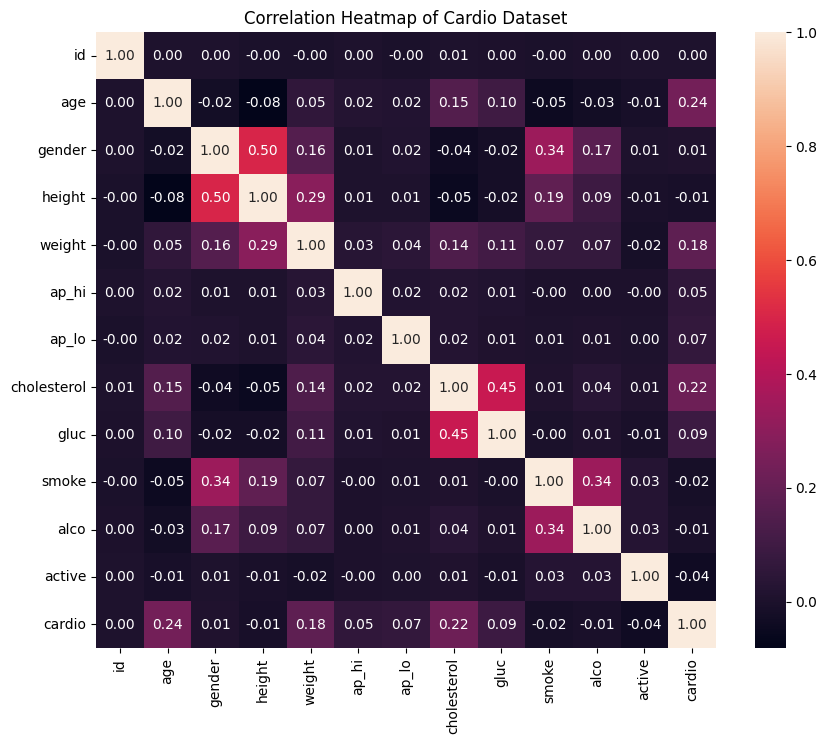

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Cardio Dataset')
plt.show()

In [7]:
X = data.drop(columns=['cardio','height','weight','id','active','ap_hi','ap_lo'])  # Features (independent variables)
y = data['cardio']  # Target variable

# Print the independent variables (features) and target variable
print("Independent variables (features):\n", X)
print("\nTarget variable:\n", y)

Independent variables (features):
          age  gender  cholesterol  gluc  smoke  alco
0      18393       2            1     1      0     0
1      20228       1            3     1      0     0
2      18857       1            3     1      0     0
3      17623       2            1     1      0     0
4      17474       1            1     1      0     0
...      ...     ...          ...   ...    ...   ...
69995  19240       2            1     1      1     0
69996  22601       1            2     2      0     0
69997  19066       2            3     1      0     1
69998  22431       1            1     2      0     0
69999  20540       1            2     1      0     0

[70000 rows x 6 columns]

Target variable:
 0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [9]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 16.31886268
Iteration 2, loss = 15.98386439
Iteration 3, loss = 15.11399279
Iteration 4, loss = 14.81176975
Iteration 5, loss = 13.26484520
Iteration 6, loss = 14.21673510
Iteration 7, loss = 10.24566445
Iteration 8, loss = 9.80697742
Iteration 9, loss = 8.57196374
Iteration 10, loss = 7.85390489
Iteration 11, loss = 4.23839758
Iteration 12, loss = 5.32268122
Iteration 13, loss = 5.59111020
Iteration 14, loss = 1.14220059
Iteration 15, loss = 2.02630930
Iteration 16, loss = 1.35155612
Iteration 17, loss = 0.91254971
Iteration 18, loss = 0.79363610
Iteration 19, loss = 0.94280405
Iteration 20, loss = 0.86610347
Iteration 21, loss = 0.78730272
Iteration 22, loss = 0.71542210
Iteration 23, loss = 0.73869182
Iteration 24, loss = 0.70158729
Iteration 25, loss = 0.73617925
Iteration 26, loss = 0.69336396
Iteration 27, loss = 0.68729701
Iteration 28, loss = 0.67824972
Iteration 29, loss = 0.67586180
Iteration 30, loss = 0.67059957
Iteration 31, loss = 0.66955458
Iteration 

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [10]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.5695238095238095